In [1]:
%load_ext autoreload
%autoreload 2

import cstrees.cstree as ct
import numpy as np
import networkx as nx

[[1 1 0 0 1]]


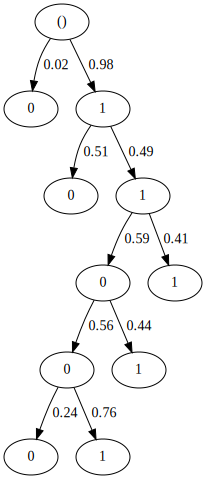

In [117]:
np.random.seed(1)
p = 5
co = ct.CausalOrder(range(1, p+1))
tree = ct.CStree(co)
cards = [2] * p
tree.set_cardinalities([None] + cards)

stage = ct.sample_random_stage(cards, 4)

x = tree.sample(1)
print(x)
a = tree.plot()
a

[[1 0 1 0 0]
 [1 0 1 0 0]
 [1 1 0 0 0]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 1 0 0]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [1 0 1 0 0]
 [1 0 0 0 1]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [1 1 0 1 0]
 [1 0 1 1 0]
 [1 0 0 1 0]
 [1 1 0 1 0]
 [1 0 1 0 0]]


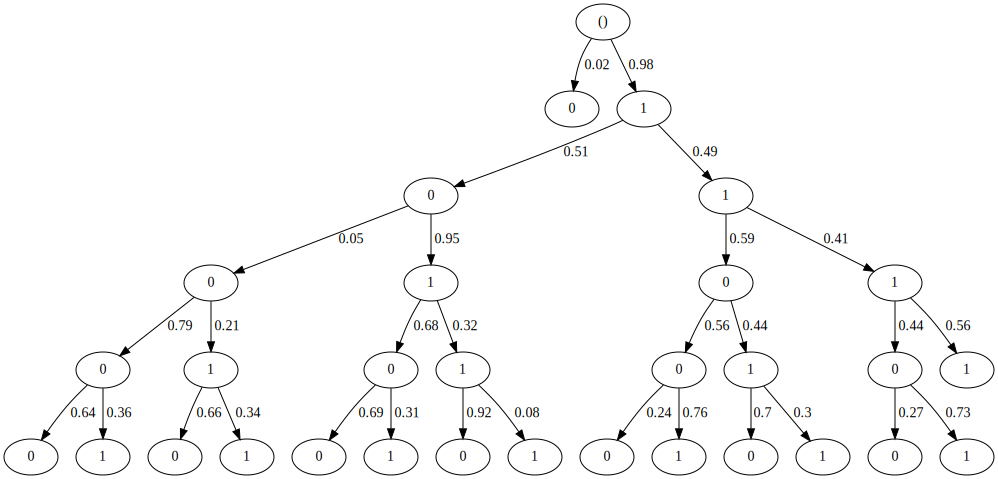

In [125]:
x = tree.sample(20)
print(x)
a = tree.plot()
a

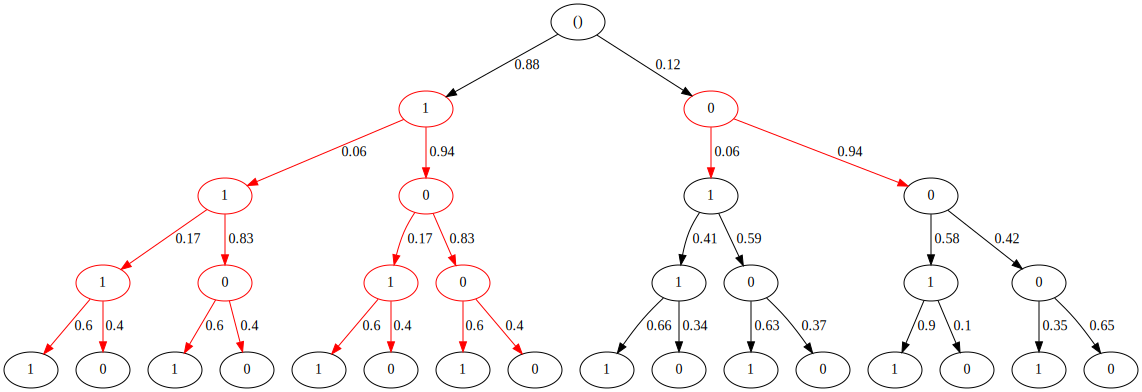

In [95]:

np.random.seed(8)#9
p = 4
t = ct.sample_cstree(p)
#for l, sl in t.stages.items():
#    for s in sl:
#        print(s.color)
a = t.plot()
a


In [193]:
csis = t.csi_relations()
for key, val in csis.items():
    print("Context: {}".format(key))
    for v in val:
        print()
        print(v.ci)
        print("From decomposition:")
        for x in ct.decomposition(v.ci):
            print(str(x))
        print("From weak union:")
        for x in ct.weak_union(v.ci):
            print(str(x))
    print("")

Context: X1=0, X3=1

X2 ⊥ X4
From decomposition:
From weak union:

Context: X1=0, X3=0

X2 ⊥ X4
From decomposition:
From weak union:

Context: X1=1

X2, X3 ⊥ X4
From decomposition:
X2 ⊥ X4
X3 ⊥ X4
From weak union:
X3 ⊥ X4 | X2
X2 ⊥ X4 | X3



In [194]:
co = t.co
adjmats = ct.csi_relations_to_dags(csis, co)
graphs=[(key,graph) for key, graph in adjmats.items()]

Context: X1=0, X3=1


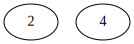

In [195]:
print("Context: {}".format(graphs[0][0]))

agraph = nx.nx_agraph.to_agraph(graphs[0][1])
agraph.layout("dot")
agraph

Context: X1=0, X3=0


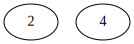

In [196]:
print("Context: {}".format(graphs[1][0]))
agraph = nx.nx_agraph.to_agraph(graphs[1][1])
agraph.layout("dot")
agraph

Context: X1=1


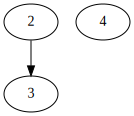

In [197]:
print("Context: {}".format(graphs[2][0]))

agraph = nx.nx_agraph.to_agraph(graphs[2][1])
agraph.layout("dot")
agraph

In [198]:
t.sample(10)

array([[0, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 1]])